# Regression Basics 

Regression is one of the most useful and popular functions in data mining and statisitc learning. 

Regression is aimed at building a **model** that can predict the value of y based on X. 

There are several key concepts related to regression: 
- **Prediction model**: There is a specific target variable y to predict. 
- **Target variable y**: the target variable is quantitative/numerical.
- **Predictors X**: independent variables
- **Learning what?** 
    - The **function** between predictors X and y. 
    - F(X) -> y
- **Learning from what?**
    - **Training set**: $(X_{train}, y_{train})$
    - $X_{train}$: predictor variables of data points in the training set
    - $y_{train}$: target variable of data points in the training set
- **How accurate is the model?**
    - **Test set**: $(X_{test}, y_{test})$ 
    - $X_{test}$: predictor variables of data points in the test set
    - Apply the model to $X_{test}$ and output $y'_{test}$, **predicted** values. 
    - $y_{test}$: **actual** values of data points in the test set, hidden from the model
    - Evaluation by comparing $y_{test}$ and $y'_{test}$
- **Evaluation metrics**: 
    - $R^2$
    - Mean squared error (MSE)
    - Root mean sqaured error (RMSE)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 

import seaborn as sns

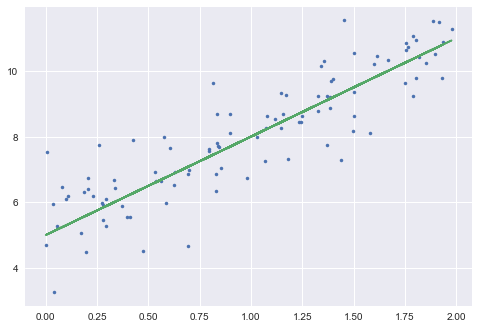

In [2]:
# let's generate some linear-looking data
# the underlying true model is y = 5 + 3x

# fix the random seed so that each run generates the same set of random numbers
np.random.seed(1) 
# generate 100 random numbers between 0 and 2 with shape (100, 1)
X = 2 * np.random.rand(100, 1)  
# generate 100 random numbers from a normal distribution
y = 5 + 3 * X + np.random.randn(100, 1)  

fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, 5+3*X)

In [3]:
# Use sklearn for linear regression
from sklearn.linear_model import LinearRegression

In [4]:
lr = LinearRegression()
lr.fit(X, y) # use the normal equation to train the model

LinearRegression()

In [5]:
# linear regression results using sklearn
# print out the intercept and coefficient(s)
print(lr.intercept_, lr.coef_)

[5.23695725] [[2.84246254]]


In [6]:
a0 = lr.intercept_[0]
a1 = lr.coef_[0,0]
(a0,a1)

(5.2369572541489084, 2.8424625438276605)

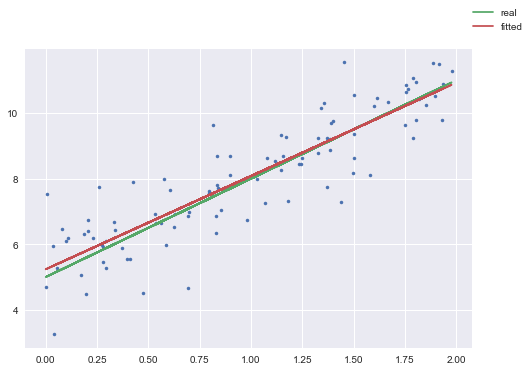

In [7]:
# Plot both the real model and the fitted model in the same graph
fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, 5+3*X, label='real')
ax.plot(X, a0+a1*X, label='fitted')
fig.legend()

### Making predictions using the model

In [8]:
# making predictions using the model
X_new = np.array([[0.6], [0.9], [1.3]])
y_new_pred = lr.predict(X_new)
y_new_pred

array([[6.94243478],
       [7.79517354],
       [8.93215856]])

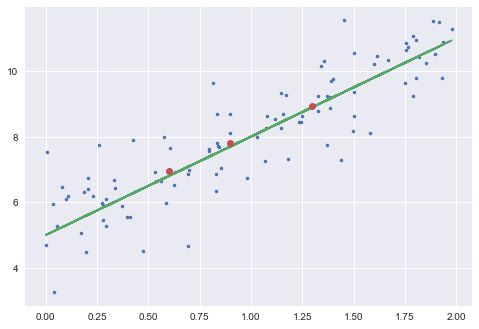

In [9]:
fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, 5+3*X)
ax.plot(X_new, y_new_pred, 'o')

In [10]:
# Apply the model to X in the training set
y_pred = lr.predict(X)

# calculate MSE and RMSE
# NOTE: the RMSE is measured on the same scale with the same units as y.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred) 
print(mse)

# Set "squared=False" to get RMSE
rmse = mean_squared_error(y, y_pred, squared=False)
print(rmse)

0.7997618656011584
0.8942940599160649


In [11]:
# R^2 of the model for the training set
lr.score(X, y)

0.7778975321559937

## OLS Regression (optional)

You can do linear regression using `statsmodels` package as follows, which gives you more information (such as R-squared and p-value) from a statistics perspective.

Checkout more at: https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm

In [12]:
import statsmodels.api as sm

In [13]:
# if you want to see the p-value, etc. use the following code

X1 = sm.add_constant(X) # Need this line to add a constant (intercept) to the linear model
ols_reg = sm.OLS(y, X1)
res = ols_reg.fit()
print(res.summary())

# exactly same results as sklearn

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     343.2
Date:                Tue, 25 May 2021   Prob (F-statistic):           8.70e-34
Time:                        22:33:13   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

## Polynomial Regression

Polynomial Regression can fit non-linear data to a linear model by adding powers of each feature as new features and then train a linear model on the extended set of features.

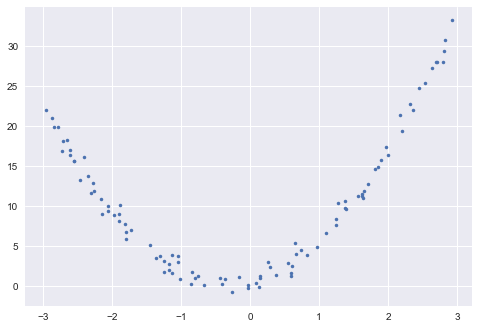

In [14]:
# generate some non-linear data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 1 + 2* X + 3 * X**2 + np.random.randn(m, 1)  # the "real" function is y = 1 + 2*x + 3*x^2

fig, ax = plt.subplots()
ax.plot(X, y, ".")

In [15]:
from sklearn.preprocessing import PolynomialFeatures
# a is a column vector representing two features x1, x2
a = np.array([[2, 3, 5], [7, 11, 13] ]).T 
print(a)

# degree=2 added x1*x2, x1^2, x2^2
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
b = poly_features_2.fit_transform(a)
print(b)
# degree=3 added x1*x2, x1^2, x2^2, x1^2*2, x2^2*x1, x1^3, x2^3
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
c = poly_features_3.fit_transform(a)
print(c)

[[ 2  7]
 [ 3 11]
 [ 5 13]]
[[  2.   7.   4.  14.  49.]
 [  3.  11.   9.  33. 121.]
 [  5.  13.  25.  65. 169.]]
[[2.000e+00 7.000e+00 4.000e+00 1.400e+01 4.900e+01 8.000e+00 2.800e+01
  9.800e+01 3.430e+02]
 [3.000e+00 1.100e+01 9.000e+00 3.300e+01 1.210e+02 2.700e+01 9.900e+01
  3.630e+02 1.331e+03]
 [5.000e+00 1.300e+01 2.500e+01 6.500e+01 1.690e+02 1.250e+02 3.250e+02
  8.450e+02 2.197e+03]]


In [16]:
print(X[:3])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]]


In [17]:
# add polynomial features for X in the plot
X_poly = poly_features_2.fit_transform(X)
print(X_poly[:3])  # X, X^2

[[-0.75275929  0.56664654]
 [ 2.70428584  7.3131619 ]
 [ 1.39196365  1.93756281]]


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[0.78134581] [[1.93366893 3.06456263]]


In [19]:
a0 = lin_reg.intercept_[0]
a1 = lin_reg.coef_[0,0]
a2 = lin_reg.coef_[0,1]
print(a0,a1,a2)

0.7813458120291479 1.933668932253607 3.0645626336170744


In [20]:
y_pred = a0 + a1*X + a2*X**2

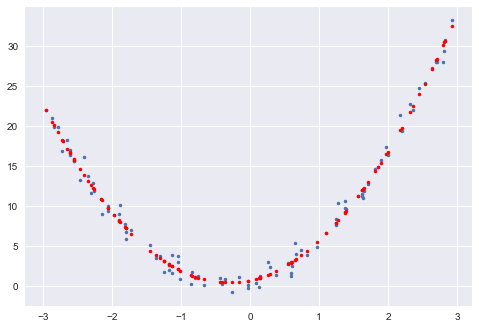

In [21]:
# the "real" function is y = 1 + 2*x + 3*x^2
# the fitted model: y = 0.781 + 1.934*X + 3.065*X^2 - pretty close
fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, y_pred, "r.")

## Log Transformation

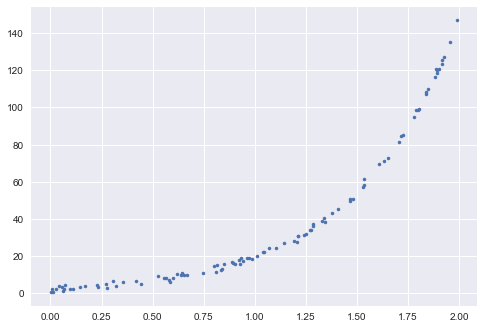

In [22]:
# generate some non-linear data
np.random.seed(12)
m = 100
X = np.random.rand(m, 1)*2 # generate random numbers between 0 and 2. 
y = np.exp(1 + 2*X)  + np.random.randn(m, 1)  # the "real" function is y = e^(1 + 2*x)

fig, ax = plt.subplots()
ax.plot(X, y, ".")

In [23]:
from sklearn.preprocessing import FunctionTransformer
# Transform a variable x using function log(1 + x)
log_transformer = FunctionTransformer(np.log1p)
a = np.array([[0], [1], [4]])
a_new = log_transformer.transform(a)
print(a)
print(a_new)

[[0]
 [1]
 [4]]
[[0.        ]
 [0.69314718]
 [1.60943791]]


In [24]:
log_y = log_transformer.transform(y)
print(y[:5])
print(log_y[:5])

[[ 6.44392545]
 [50.78005844]
 [ 9.26450025]
 [24.62412344]
 [ 2.42007296]]
[[2.00739832]
 [3.9470051 ]
 [2.32869136]
 [3.24353423]
 [1.22966188]]


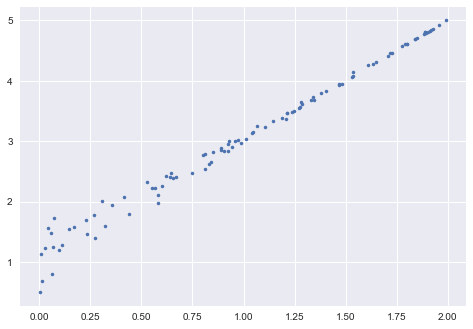

In [25]:
fig, ax = plt.subplots()
ax.plot(X, log_y, ".")

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X, log_y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.10810736] [[1.94320646]]


In [27]:
a0 = lin_reg.intercept_[0]
a1 = lin_reg.coef_[0,0]
(a0,a1)

(1.1081073623725606, 1.9432064635549415)

In [28]:
# predicted values of y. 
# make sure to transform the value using function exp(x) - 1
y_pred = np.expm1(a0 + a1*X)

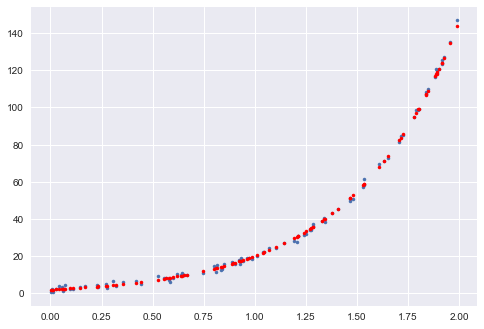

In [29]:
# the "real" function is y = e^(1 + 2*x)
# the fitted model: y = e^(a0 + a1*x) 
fig, ax = plt.subplots()
ax.plot(X, y, ".")
ax.plot(X, y_pred, "r.")